In [1]:
#import all necessary packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import plot, show
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
#Reading the csv files
train=pd.read_csv('./bank/bank-additional/bank-additional-full.csv',sep=';')
test=pd.read_csv('./bank/bank-additional/bank-additional.csv',sep=';')

In [3]:
train[train['housing']=='unknown'].head(20)                        

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
470,42,technician,single,professional.course,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
485,36,admin.,married,university.degree,no,unknown,unknown,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
494,32,admin.,single,university.degree,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
495,31,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
501,33,admin.,married,basic.9y,no,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### we see that the column 'duration' seems skewed.  Also the range of 'nr.employed' is quite off scales for other columns. 

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


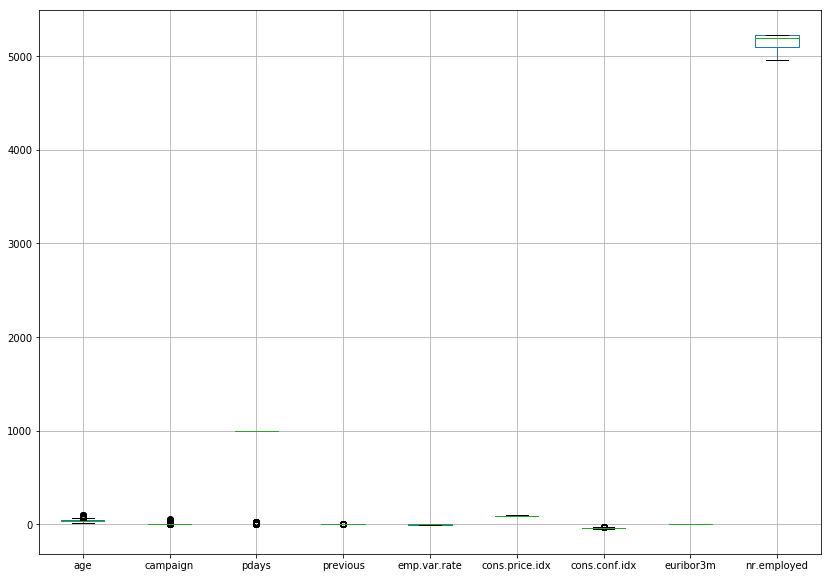

In [6]:
quant=train[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
fig = plt.figure(figsize=(14, 10))
print(quant.columns)
quant.boxplot()
#plt.set_title('Default', fontsize=10)
plt.show()

In [8]:
train[train['housing']=='unknown']['housing'].value_counts().sum()

990

In [9]:
train['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

### We see that job contains some unknown data so we need to check if response is independent on the unknown values of the job. Therefore the job can be grouped into known and unknown categories. Then they will be tested using the contigency table

In [10]:
job_known=train[train['job']!='unknown']
job_known_yes=job_known[job_known['y']=='yes'].y.value_counts().sum()
job_known_no=job_known[job_known['y']=='no'].y.value_counts().sum()

job_unknown=train[train['job']=='unknown']
job_unknown_yes=job_unknown[job_unknown['y']=='yes'].y.value_counts().sum()
job_unknown_no=job_unknown[job_unknown['y']=='no'].y.value_counts().sum()

obs = np.array([[job_known_no, job_known_yes], [job_unknown_no, job_unknown_yes]])
obs
stats.chi2_contingency(obs)
# output are the t-test statistic, p value and the expected values as 2 x 2 array

(0.0032104107038062905,
 0.954815650813677,
 1,
 array([[36255.17587647,  4602.82412353],
        [  292.82412353,    37.17587647]]))

### The Chi-square test for 2 x 2 contignency table indicates that p value = 0.9548 meaning H0 hypothesis(independence) can be accepted, i.e., the unknown status (missing data for job) does not impact the outcome of response. The missing of job data is randomly missed and therefore we may delete those missing data. There are 330 missing data for job need to be removed.

In [11]:
train=train[train['job']!='unknown']
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40858 entries, 0 to 41187
Data columns (total 21 columns):
age               40858 non-null int64
job               40858 non-null object
marital           40858 non-null object
education         40858 non-null object
default           40858 non-null object
housing           40858 non-null object
loan              40858 non-null object
contact           40858 non-null object
month             40858 non-null object
day_of_week       40858 non-null object
duration          40858 non-null int64
campaign          40858 non-null int64
pdays             40858 non-null int64
previous          40858 non-null int64
poutcome          40858 non-null object
emp.var.rate      40858 non-null float64
cons.price.idx    40858 non-null float64
cons.conf.idx     40858 non-null float64
euribor3m         40858 non-null float64
nr.employed       40858 non-null float64
y                 40858 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [12]:
marital_known=train[train['marital']!='unknown']
marital_known_yes=marital_known[marital_known['y']=='yes'].y.value_counts().sum()
marital_known_no=marital_known[marital_known['y']=='no'].y.value_counts().sum()

marital_unknown=train[train['marital']=='unknown']
marital_unknown_yes=marital_unknown[marital_unknown['y']=='yes'].y.value_counts().sum()
marital_unknown_no=marital_unknown[marital_unknown['y']=='no'].y.value_counts().sum()

obs = np.array([[marital_known_no, marital_known_yes], [marital_unknown_no, marital_unknown_yes]])
print(obs)
stats.chi2_contingency(obs)
# output are the t-test statistic, p value and the expected values as 2 x 2 array

[[36193  4594]
 [   62     9]]


(0.03546075783643671,
 0.8506334349774844,
 1,
 array([[3.61919988e+04, 4.59500125e+03],
        [6.30012482e+01, 7.99875177e+00]]))

### The Chi-square test for 2 x 2 contignency table indicates that p value = 0.8506 meaning H0 hypothesis(independence) can be accepted, i.e., the unknown status (missing data for marital) does not impact the outcome of response. The missing of marital data is randomly missed and therefore we may delete those missing data. There are 71 missing data for marital status need to be removed.

In [13]:
train=train[train['marital']!='unknown']
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40787 entries, 0 to 41187
Data columns (total 21 columns):
age               40787 non-null int64
job               40787 non-null object
marital           40787 non-null object
education         40787 non-null object
default           40787 non-null object
housing           40787 non-null object
loan              40787 non-null object
contact           40787 non-null object
month             40787 non-null object
day_of_week       40787 non-null object
duration          40787 non-null int64
campaign          40787 non-null int64
pdays             40787 non-null int64
previous          40787 non-null int64
poutcome          40787 non-null object
emp.var.rate      40787 non-null float64
cons.price.idx    40787 non-null float64
cons.conf.idx     40787 non-null float64
euribor3m         40787 non-null float64
nr.employed       40787 non-null float64
y                 40787 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [14]:
education_known=train[train['education']!='unknown']
education_known_yes=education_known[education_known['y']=='yes'].y.value_counts().sum()
education_known_no=education_known[education_known['y']=='no'].y.value_counts().sum()

education_unknown=train[train['education']=='unknown']
education_unknown_yes=education_unknown[education_unknown['y']=='yes'].y.value_counts().sum()
education_unknown_no=education_unknown[education_unknown['y']=='no'].y.value_counts().sum()

obs = np.array([[education_known_no, education_known_yes], [education_unknown_no, education_unknown_yes]])
print(obs)
stats.chi2_contingency(obs)
# output are the t-test statistic, p value and the expected values as 2 x 2 array

[[34831  4360]
 [ 1362   234]]


(18.839319987021295,
 1.4220510422823373e-05,
 1,
 array([[34776.76374825,  4414.23625175],
        [ 1416.23625175,   179.76374825]]))

### The Chi-square test for 2 x 2 contignency table indicates that p value = 1.422 e -5 meaning H0 hypothesis(independence) cannot be accepted, i.e., the unknown status (missing data for education) impacts the outcome of response. Therefore we are to keep the missing data for education and use them as new category.

In [15]:
default_known=train[train['default']!='unknown']
default_known_yes=default_known[default_known['y']=='yes'].y.value_counts().sum()
default_known_no=default_known[default_known['y']=='no'].y.value_counts().sum()

default_unknown=train[train['default']=='unknown']
default_unknown_yes=default_unknown[default_unknown['y']=='yes'].y.value_counts().sum()
default_unknown_no=default_unknown[default_unknown['y']=='no'].y.value_counts().sum()

obs = np.array([[default_known_no, default_known_yes], [default_unknown_no, default_unknown_yes]])
print(obs)
stats.chi2_contingency(obs)
# output are the t-test statistic, p value and the expected values as 2 x 2 array

[[28193  4158]
 [ 8000   436]]


(394.5576157356691,
 8.427395364909715e-88,
 1,
 array([[28707.1798122,  3643.8201878],
        [ 7485.8201878,   950.1798122]]))

### The Chi-square test for 2 x 2 contignency table indicates that p value = 8.427 e -88 meaning H0 hypothesis(independence) cannot be accepted, i.e., the unknown status (missing data for default) impacts the outcome of response. Therefore we are to keep the missing data for default and use them as new category.

In [16]:
housing_known=train[train['housing']!='unknown']
housing_known_yes=housing_known[housing_known['y']=='yes'].y.value_counts().sum()
housing_known_no=housing_known[housing_known['y']=='no'].y.value_counts().sum()

housing_unknown=train[train['housing']=='unknown']
housing_unknown_yes=housing_unknown[housing_unknown['y']=='yes'].y.value_counts().sum()
housing_unknown_no=housing_unknown[housing_unknown['y']=='no'].y.value_counts().sum()

obs = np.array([[housing_known_no, housing_known_yes], [housing_unknown_no, housing_unknown_yes]])
print(obs)
stats.chi2_contingency(obs)
# output are the t-test statistic, p value and the expected values as 2 x 2 array

[[35316  4487]
 [  877   107]]


(0.11566252063728887,
 0.7337872991241348,
 1,
 array([[35319.83178464,  4483.16821536],
        [  873.16821536,   110.83178464]]))

### The Chi-square test for 2 x 2 contignency table indicates that p value = 0.7338 meaning H0 hypothesis(independence) can be accepted, i.e., the unknown status (missing data for housing) doe not impact the outcome of response.

In [17]:
loan_known=train[train['loan']!='unknown']
loan_known_yes=loan_known[loan_known['y']=='yes'].y.value_counts().sum()
loan_known_no=loan_known[loan_known['y']=='no'].y.value_counts().sum()

loan_unknown=train[train['loan']=='unknown']
loan_unknown_yes=loan_unknown[loan_unknown['y']=='yes'].y.value_counts().sum()
loan_unknown_no=loan_unknown[loan_unknown['y']=='no'].y.value_counts().sum()

obs = np.array([[loan_known_no, loan_known_yes], [loan_unknown_no, loan_unknown_yes]])
print(obs)
stats.chi2_contingency(obs)
# output are the t-test statistic, p value and the expected values as 2 x 2 array

[[35316  4487]
 [  877   107]]


(0.11566252063728887,
 0.7337872991241348,
 1,
 array([[35319.83178464,  4483.16821536],
        [  873.16821536,   110.83178464]]))

In [18]:
y_yes=train[train['y']=='yes']['y'].value_counts().sum()
y_no=train[train['y']=='no']['y'].value_counts().sum()
yes_pct=y_yes/(y_yes+y_no)
print(yes_pct)

0.11263392747689215


  ### We can see from calculation that the percentage of making deposits is about 11.2% of all subjects. The goal of this project is to predict the chance of people making deposit and the dataset makes imbalanced in term of this goal. Therefore it is feasible to either reduce the portion of non-making deposits or increase the portion of making depostis.

## Explanatory data analysis (EDA)

### It is reasonable to divide ages into groups such as Young, Middle age and senior to study impact on the deposits

In [19]:
#group age into three categories: 17-35 young, 36-55 middle age, and 56+ senior
bins = [17, 35, 55, 100]
labels = ['young', 'middle-age', 'senior']
train['agerange'] = pd.cut(train.age, bins, labels = labels,include_lowest = True)

print(train[:10])

   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week     ...      pdays  previous     poutcome  \
0  telephone   may         mon     ...        999         0  nonexistent   
1  telephone   may    

In [20]:
bank_age=train.sort_values(by='agerange')

age_total=bank_age['agerange'].value_counts()
age_total.sort_index(inplace=True)

age_no=bank_age[bank_age['y']=='no']['agerange'].value_counts()
age_no.sort_index(inplace=True)

age_yes=bank_age[bank_age['y']=='yes']['agerange'].value_counts()
age_yes.sort_index(inplace=True)

print(age_no)
print(age_yes)
#age_no=age_no/(age_no+age_yes)
#age_yes=1-age_no
#print(age_no)
#print(age_yes)

young         14328
middle-age    19078
senior         2787
Name: agerange, dtype: int64
young         2071
middle-age    1797
senior         726
Name: agerange, dtype: int64


   Deposit  No Deposit    agerange
0     2071       14328       young
1     1797       19078  middle-age
2      726        2787      senior
young         16399
middle-age    20875
senior         3513
Name: agerange, dtype: int64


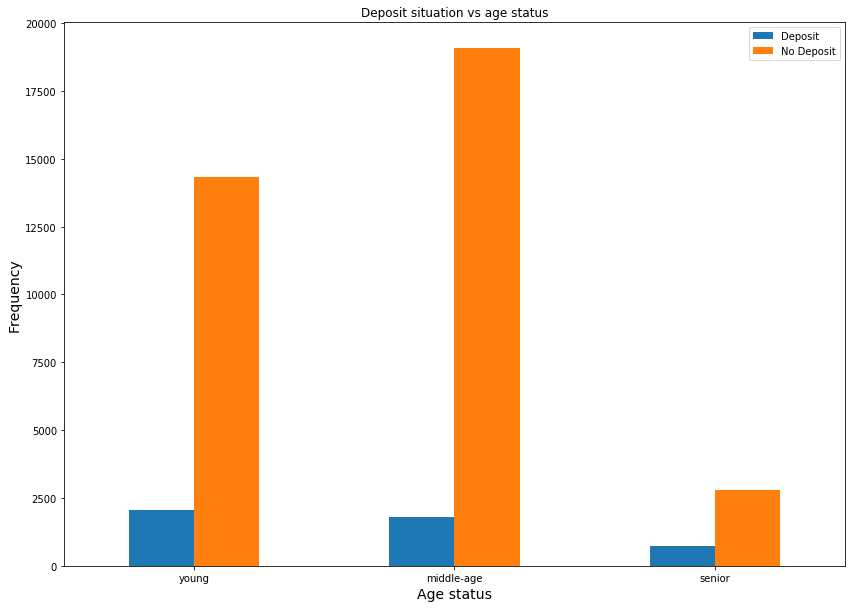

In [21]:
df = pd.DataFrame({
              'agerange':['young', 'middle-age', 'senior'],
              'No Deposit':age_no.values,
              'Deposit':age_yes.values}
             )
print(df)
print(age_total)
df = df.set_index(['agerange'])

ax = df.plot(kind='bar', title ="Deposit situation vs age status", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("Age status", fontsize=14,rotation=0)
ax.set_ylabel("Frequency", fontsize=14,rotation=90)
plt.show()

### It can been seen that more fraction of senior made deposits but young and middle aged take more percentage.  

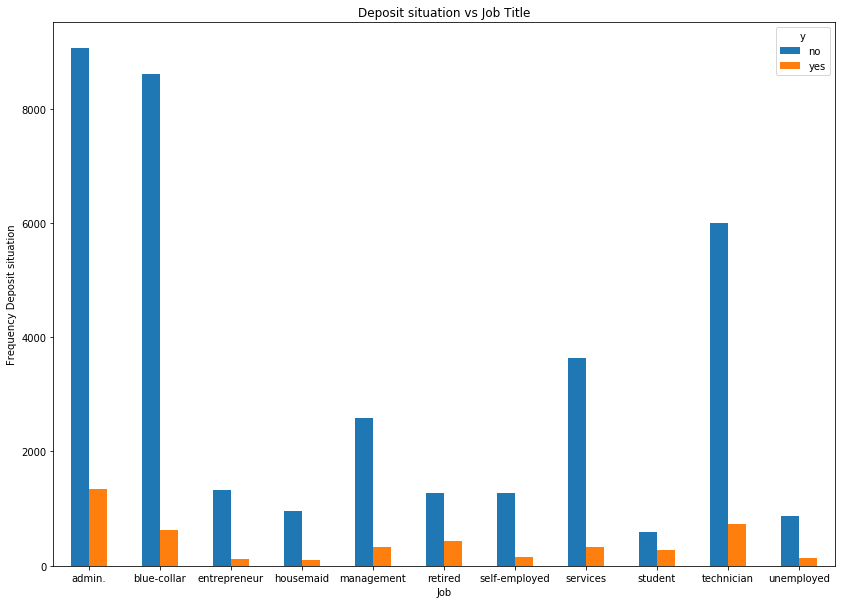

In [22]:
pd.crosstab(train.job,train.y).plot(kind='bar',figsize=(14, 10))
plt.title('Deposit situation vs Job Title')
plt.xlabel('Job')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Deposit situation')
plt.savefig('Deposit_fre_job')

### It seems that the situation of  making deposits among all employment status correlate to the employment. 

In [23]:
bank_marital = train.sort_values(by='marital')

marital_total=bank_marital['marital'].value_counts()
marital_total.sort_index(inplace=True)

marital_no=bank_marital[bank_marital['y']=='no']['marital'].value_counts()
marital_no.sort_index(inplace=True)

marital_yes=bank_marital[bank_marital['y']=='yes']['marital'].value_counts()
marital_yes.sort_index(inplace=True)

print(marital_no)
print(marital_yes)
marital_no=marital_no/(marital_no + marital_yes)
marital_yes=1-marital_no
print(marital_no)
print(marital_yes)

divorced     4126
married     22178
single       9889
Name: marital, dtype: int64
divorced     473
married     2516
single      1605
Name: marital, dtype: int64
divorced    0.897152
married     0.898113
single      0.860362
Name: marital, dtype: float64
divorced    0.102848
married     0.101887
single      0.139638
Name: marital, dtype: float64


    Deposit  No Deposit   marital
0  0.102848    0.897152  divorced
1  0.101887    0.898113   married
2  0.139638    0.860362    single
divorced     4599
married     24694
single      11494
Name: marital, dtype: int64


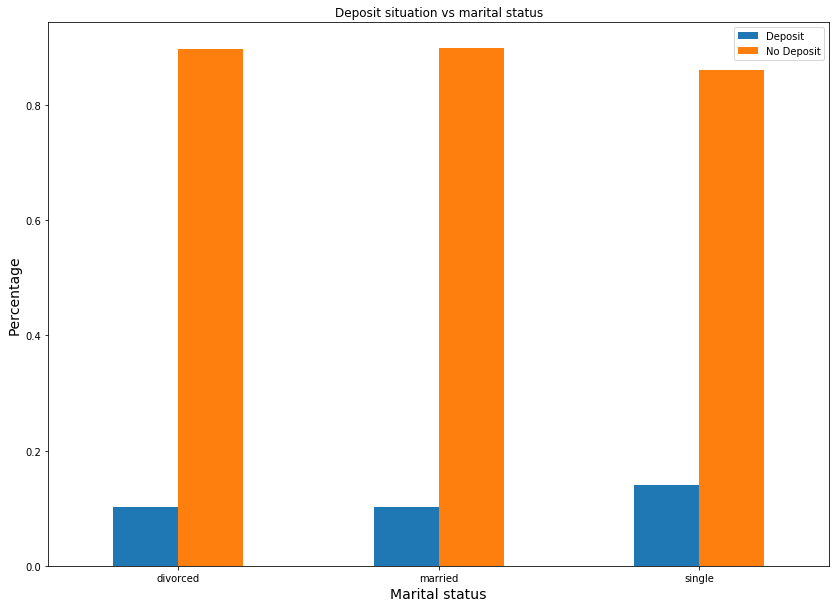

In [24]:
df = pd.DataFrame({
              'marital':['divorced', 'married', 'single'],
              'No Deposit':marital_no.values,
              'Deposit':marital_yes.values}
             )
print(df)
print(marital_total)
df = df.set_index(['marital'])

ax = df.plot(kind='bar', title ="Deposit situation vs marital status", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("Marital status", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()


#### It seem that the marital status does not affect the deposit. About 10% all marital status made deposits.

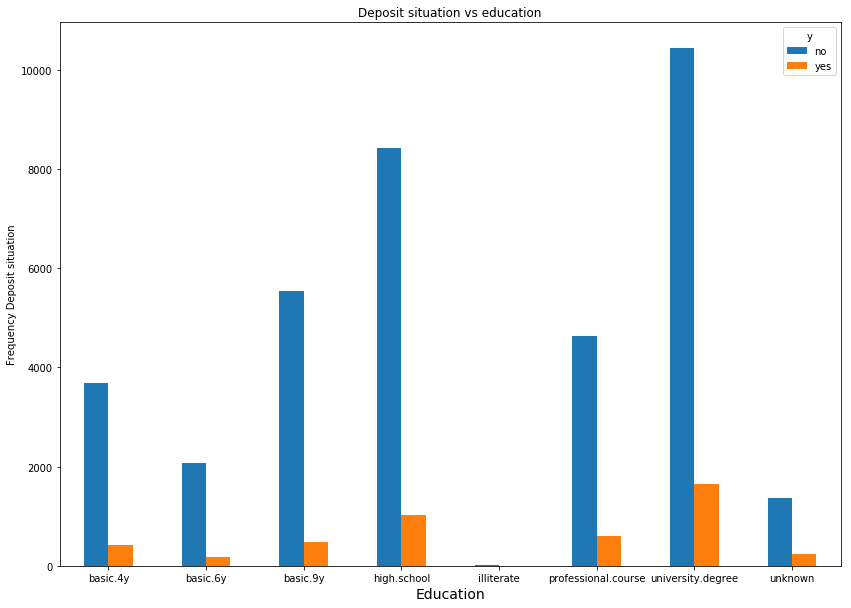

In [25]:
pd.crosstab(train.education,train.y).plot(kind='bar',figsize=(14, 10))
plt.title('Deposit situation vs education')
plt.xlabel('Education',fontsize=14,rotation=0)
plt.xticks(rotation = 0)
plt.ylabel('Frequency Deposit situation')
plt.savefig('education_fre_job')

### 14% of university degree holder made deposits and this group makes the majority of all people of interest. It seems that more education leads to more deposits

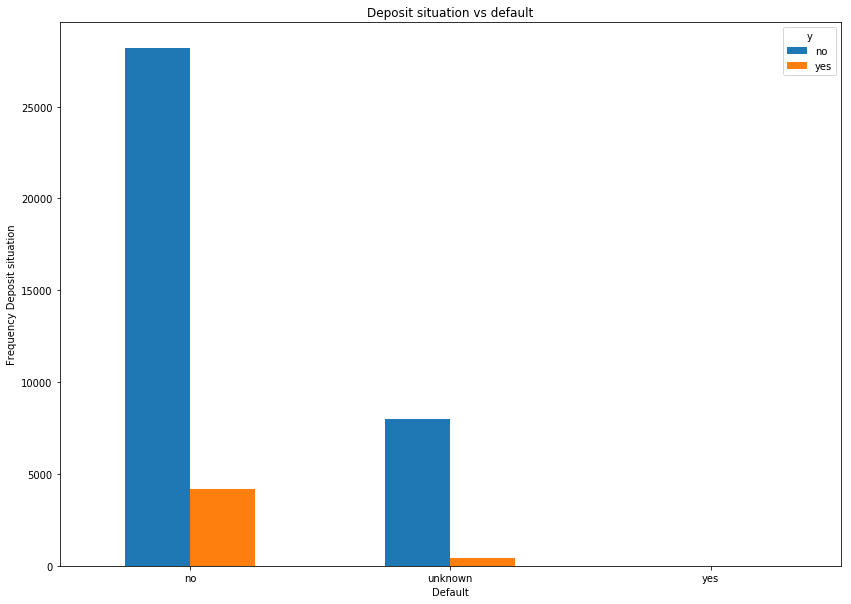

In [26]:
pd.crosstab(train.default,train.y).plot(kind='bar',figsize=(14, 10))
plt.title('Deposit situation vs default')
plt.xlabel('Default')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Deposit situation')
plt.savefig('default_fre_job')

### It is seen that the default status doe not impact deposit since most of people do not default and about 13% of them made deposits.

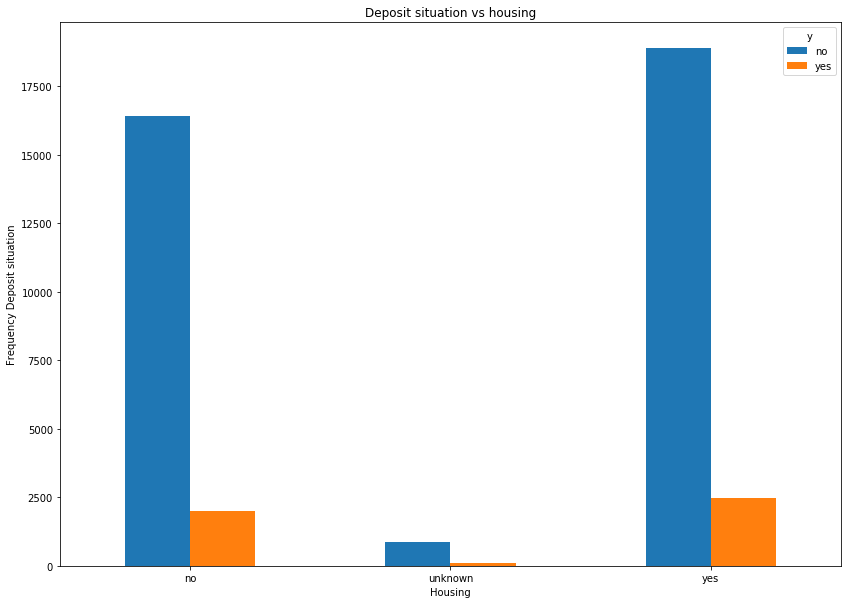

In [27]:
pd.crosstab(train.housing,train.y).plot(kind='bar',figsize=(14, 10))
plt.title('Deposit situation vs housing')
plt.xlabel('Housing')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Deposit situation')
plt.savefig('housing_fre_job')

### It is obvious that the housing status does not impact the deposits. 

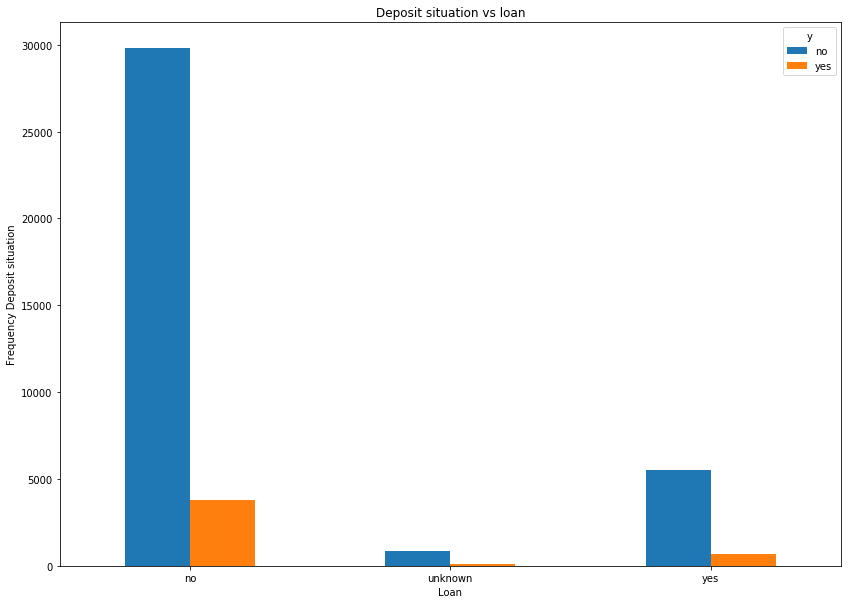

In [28]:
pd.crosstab(train.loan,train.y).plot(kind='bar',figsize=(14, 10))
plt.title('Deposit situation vs loan')
plt.xlabel('Loan')
plt.xticks(rotation = 0)
plt.ylabel('Frequency Deposit situation')
plt.savefig('loan_fre_job')

### It is obvious that the loan does not affect the deposits.

In [29]:
bank_contact=train.sort_values(by='contact')

contact_total=bank_contact['contact'].value_counts()
contact_total.sort_index(inplace=True)

contact_no=bank_contact[bank_contact['y']=='no']['contact'].value_counts()
contact_no.sort_index(inplace=True)

contact_yes=bank_contact[bank_contact['y']=='yes']['contact'].value_counts()
contact_yes.sort_index(inplace=True)

print(contact_no)
print(contact_yes)
contact_no=contact_no/(contact_no + contact_yes)
contact_yes=1-contact_no
print(contact_no)
print(contact_yes)

cellular     22110
telephone    14083
Name: contact, dtype: int64
cellular     3818
telephone     776
Name: contact, dtype: int64
cellular     0.852746
telephone    0.947776
Name: contact, dtype: float64
cellular     0.147254
telephone    0.052224
Name: contact, dtype: float64


    Deposit  No Deposit    contact
0  0.147254    0.852746   cellular
1  0.052224    0.947776  telephone
cellular     25928
telephone    14859
Name: contact, dtype: int64


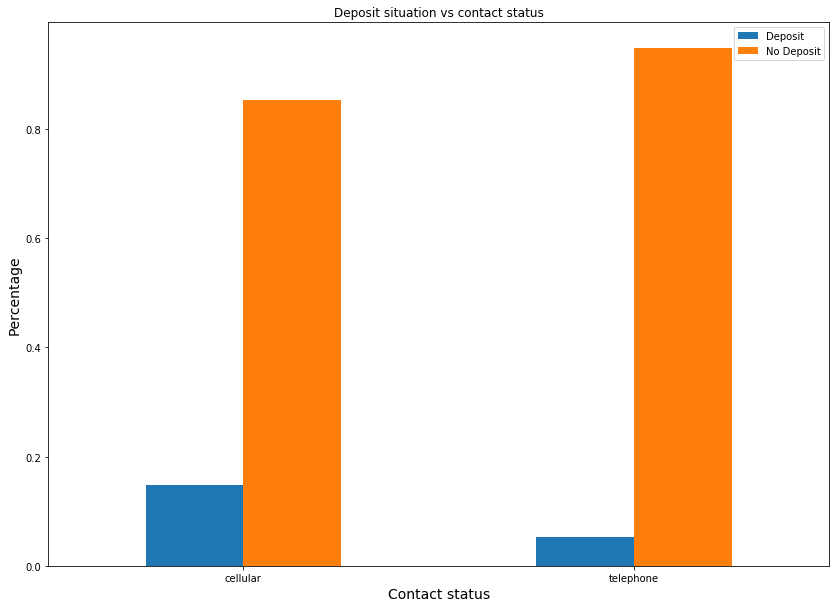

In [30]:
df = pd.DataFrame({
              'contact':['cellular', 'telephone'],
              'No Deposit':contact_no.values,
              'Deposit':contact_yes.values}
             )
print(df)
print(contact_total)
df = df.set_index(['contact'])

ax = df.plot(kind='bar', title ="Deposit situation vs contact status", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("Contact status", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It indicates that more people are using cell phone than regular phones. Meanwhile about 15% cell phone users made deposits

In [31]:
bank_month=train.sort_values(by='month')

month_total=bank_month['month'].value_counts()
month_total.sort_index(inplace=True)

month_no=bank_month[bank_month['y']=='no']['month'].value_counts()
month_no.sort_index(inplace=True)

month_yes=bank_month[bank_month['y']=='yes']['month'].value_counts()
month_yes.sort_index(inplace=True)

print(month_no)
print(month_yes)
month_no=month_no/(month_no + month_yes)
month_yes=1-month_no
print(month_no)
print(month_yes)

apr     2083
aug     5462
dec       92
jul     6476
jun     4697
mar      267
may    12737
nov     3674
oct      396
sep      309
Name: month, dtype: int64
apr    537
aug    646
dec     88
jul    642
jun    548
mar    274
may    882
nov    413
oct    311
sep    253
Name: month, dtype: int64
apr    0.795038
aug    0.894237
dec    0.511111
jul    0.909806
jun    0.895520
mar    0.493530
may    0.935238
nov    0.898948
oct    0.560113
sep    0.549822
Name: month, dtype: float64
apr    0.204962
aug    0.105763
dec    0.488889
jul    0.090194
jun    0.104480
mar    0.506470
may    0.064762
nov    0.101052
oct    0.439887
sep    0.450178
Name: month, dtype: float64


apr     2620
aug     6108
dec      180
jul     7118
jun     5245
mar      541
may    13619
nov     4087
oct      707
sep      562
Name: month, dtype: int64
        Deposit  No Deposit
month                      
3      0.506470    0.493530
4      0.204962    0.795038
5      0.064762    0.935238
6      0.104480    0.895520
7      0.090194    0.909806
8      0.105763    0.894237
9      0.450178    0.549822
10     0.439887    0.560113
11     0.101052    0.898948
12     0.488889    0.511111


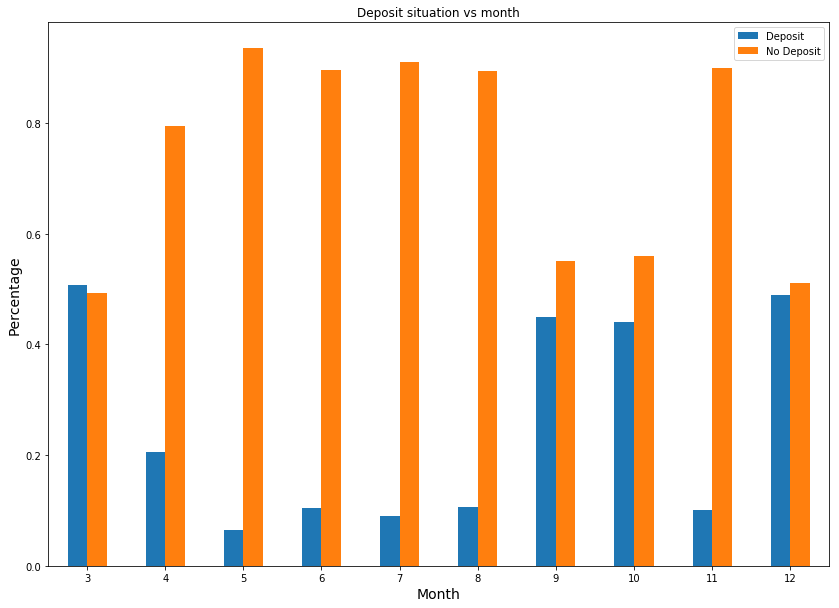

In [32]:
df = pd.DataFrame({
              'month':['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
              'No Deposit':month_no.values,
              'Deposit':month_yes.values}
             )

print(month_total)

df['month'] = pd.to_datetime(df.month, format='%b', errors='coerce').dt.month
df = df.sort_values(by='month')
df = df.set_index(['month'])
print(df)
#df = df.groupby(df['month'])


ax = df.plot(kind='bar', title ="Deposit situation vs month", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("Month", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It is shown that in May and July when most of people surveyed about 10% people made deposits. In December, the lowest number of people surveyed this may due to the holiday season when there is no business running therefore the survey activities are not run.

In [33]:
bank_day=train.sort_values(by='day_of_week')

day_total=bank_day['day_of_week'].value_counts()
day_total.sort_index(inplace=True)

day_no=bank_day[bank_day['y']=='no']['day_of_week'].value_counts()
day_no.sort_index(inplace=True)

day_yes=bank_day[bank_day['y']=='yes']['day_of_week'].value_counts()
day_yes.sort_index(inplace=True)

print(day_no)
print(day_yes)
day_no=day_no/(day_no + day_yes)
day_yes=1-day_no
print(day_no)
print(day_yes)

fri    6940
mon    7579
thu    7497
tue    7060
wed    7117
Name: day_of_week, dtype: int64
fri     839
mon     841
thu    1033
tue     946
wed     935
Name: day_of_week, dtype: int64
fri    0.892146
mon    0.900119
thu    0.878898
tue    0.881839
wed    0.883880
Name: day_of_week, dtype: float64
fri    0.107854
mon    0.099881
thu    0.121102
tue    0.118161
wed    0.116120
Name: day_of_week, dtype: float64


fri    7779
mon    8420
thu    8530
tue    8006
wed    8052
Name: day_of_week, dtype: int64
              Deposit  No Deposit
day_of_week                      
fri          0.107854    0.892146
mon          0.099881    0.900119
thu          0.121102    0.878898
tue          0.118161    0.881839
wed          0.116120    0.883880


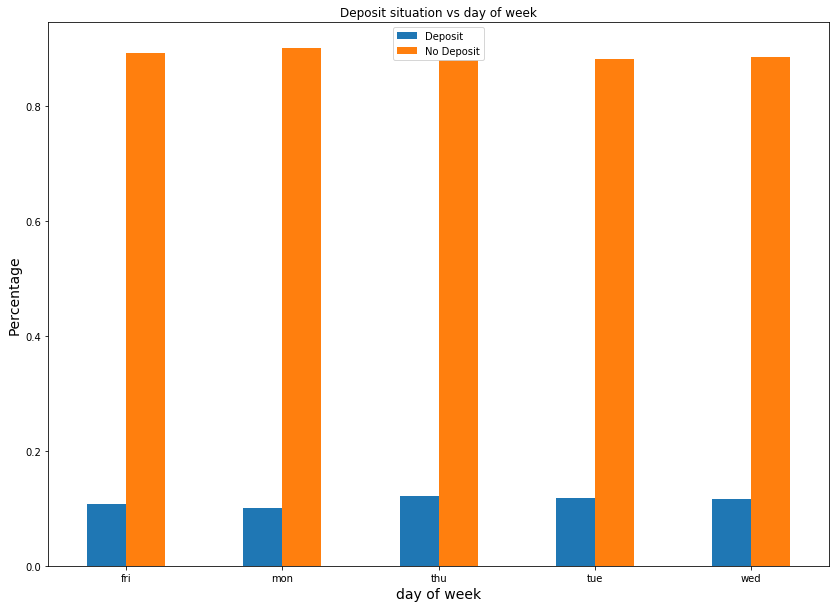

In [34]:
df = pd.DataFrame({
              'day_of_week':['fri','mon','thu', 'tue', 'wed'],
              'No Deposit':day_no.values,
              'Deposit':day_yes.values}
             )
print(day_total)

df = df.set_index(['day_of_week'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs day of week", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("day of week", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### There is no dependence of day of week on the deposits and all weekdays about 11% people made deposits

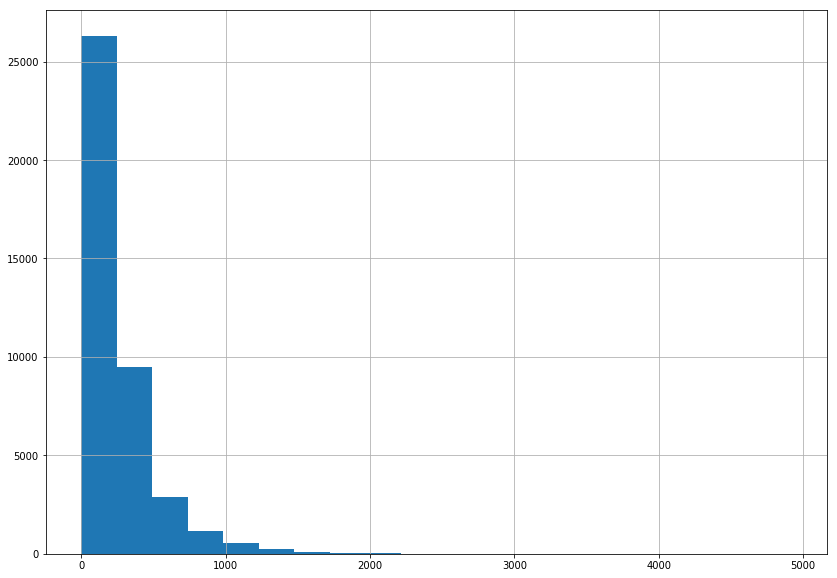

In [35]:
fig = plt.figure(figsize=(14, 10))
train['duration'].hist(bins=20)

In [ ]:
#group duration into three categories: 0-102 short, 103-319 medium, and 320+ long
bins = [0, 102, 319, 4918]
labels = ['short', 'medium', 'long']
bank_additional_full_df['durationrange'] = pd.cut(bank_additional_full_df.duration, bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_duration=bank_additional_full_df.sort_values(by='durationrange')

duration_total=bank_duration['durationrange'].value_counts()
duration_total.sort_index(inplace=True)

duration_no=bank_duration[bank_duration['y']=='no']['durationrange'].value_counts()
duration_no.sort_index(inplace=True)

duration_yes=bank_duration[bank_duration['y']=='yes']['durationrange'].value_counts()
duration_yes.sort_index(inplace=True)

print(duration_no)
print(duration_yes)
duration_no=duration_no/(duration_no + duration_yes)
duration_yes=1-duration_no
print(duration_no)
print(duration_yes)

In [ ]:
df = pd.DataFrame({
              'durationrange':['short', 'medium', 'long'],
              'No Deposit':duration_no.values,
              'Deposit':duration_yes.values}
             )

print(duration_total)

#df['day_of_week'] = pd.to_datetime(df.day, format='%b', errors='coerce').dt.day
#df = df.sort_values(by='durationrange')
df = df.set_index(['durationrange'])
print(df)
#df = df.groupby(df['month'])


ax = df.plot(kind='bar', title ="Deposit situation vs duration", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("duration", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

#### The relationship between duration and deposits: longer the duration, more fractions people made deposits.

In [ ]:
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['campaign'].hist(bins=20)

In [ ]:
#group campaign into three categories: 0-1 small, 2-5 medium, and 6+ large
bins = [0, 1, 5, 56]
labels = ['small', 'medium', 'large']
bank_additional_full_df['campaignrange'] = pd.cut(bank_additional_full_df.campaign, bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_campaign=bank_additional_full_df.sort_values(by='campaignrange')

campaign_total=bank_campaign['campaignrange'].value_counts()
campaign_total.sort_index(inplace=True)

campaign_no=bank_campaign[bank_campaign['y']=='no']['campaignrange'].value_counts()
campaign_no.sort_index(inplace=True)

campaign_yes=bank_campaign[bank_campaign['y']=='yes']['campaignrange'].value_counts()
campaign_yes.sort_index(inplace=True)

print(campaign_no)
print(campaign_yes)
campaign_no=campaign_no/(campaign_no + campaign_yes)
campaign_yes=1-campaign_no
print(campaign_no)
print(campaign_yes)

In [ ]:
df = pd.DataFrame({
              'campaignrange':['small', 'medium', 'large'],
              'No Deposit':campaign_no.values,
              'Deposit':campaign_yes.values}
             )

print(campaign_total)


#df = df.sort_values(by='campaignrange')
df = df.set_index(['campaignrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs campaign", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("Campaign", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It shows that the bigger of the size of the campaign, less people made deposits.

In [ ]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['pdays'].hist(bins=20)
print(bank_additional_full_df['pdays'].unique())

In [ ]:
#group pdays into three categories: 0-6 short, 7-21 medium, 22-27 long, and 28-999 never
bins = [0, 6, 21, 27, 999]
labels = ['short', 'medium', 'long','never']
bank_additional_full_df['pdaysrange'] = pd.cut(bank_additional_full_df.pdays, bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_pdays=bank_additional_full_df.sort_values(by='pdaysrange')

pdays_total=bank_pdays['pdaysrange'].value_counts()
pdays_total.sort_index(inplace=True)

pdays_no=bank_pdays[bank_pdays['y']=='no']['pdaysrange'].value_counts()
pdays_no.sort_index(inplace=True)

pdays_yes=bank_pdays[bank_pdays['y']=='yes']['pdaysrange'].value_counts()
pdays_yes.sort_index(inplace=True)

print(pdays_no)
print(pdays_yes)
pdays_no=pdays_no/(pdays_no + pdays_yes)
pdays_yes=1-pdays_no
print(pdays_no)
print(pdays_yes)

In [ ]:
df = pd.DataFrame({
              'pdaysrange':['short', 'medium', 'long','never'],
              'No Deposit':pdays_no.values,
              'Deposit':pdays_yes.values}
             )

print(pdays_total)


#df = df.sort_values(by='pdaysrange')
df = df.set_index(['pdaysrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs pdays", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("Pdays", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It can be seen that shorter the pdays,  more people made deposits.

In [ ]:
# previous: number of contacts performed before this campaign and for this client (numeric)
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['previous'].hist(bins=20)
print(bank_additional_full_df['previous'].unique())

In [ ]:
#group previous into three categories: 0-1 less, 2-5 medium, 6-7 more
bins = [0, 1, 5, 7]
labels = ['less', 'medium', 'more']
bank_additional_full_df['previousrange'] = pd.cut(bank_additional_full_df.previous, bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_previous=bank_additional_full_df.sort_values(by='previousrange')

previous_total=bank_previous['previousrange'].value_counts()
previous_total.sort_index(inplace=True)

previous_no=bank_previous[bank_previous['y']=='no']['previousrange'].value_counts()
previous_no.sort_index(inplace=True)

previous_yes=bank_previous[bank_previous['y']=='yes']['previousrange'].value_counts()
previous_yes.sort_index(inplace=True)

print(previous_no)
print(previous_yes)
previous_no=previous_no/(previous_no + previous_yes)
previous_yes=1-previous_no
print(previous_no)
print(previous_yes)

In [ ]:
df = pd.DataFrame({
              'previousrange':['less', 'medium', 'more'],
              'No Deposit':previous_no.values,
              'Deposit':previous_yes.values}
             )

print(previous_total)


#df = df.sort_values(by='pdaysrange')
df = df.set_index(['previousrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs previous", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("previous", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It shows that the more previous contact, more people made deposits.

In [ ]:
# emp.var.rate: employment variation rate - quarterly indicator (numeric)
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['emp.var.rate'].hist(bins=10)
print(bank_additional_full_df['emp.var.rate'].unique())

In [ ]:
#group emp.var.rate into three categories: -3.40--2 small, -2-0 medium, 0-1.4 large
bins = [-3.40, -2, 0, 1.4]
labels = ['small', 'medium', 'large']
bank_additional_full_df['emp.var.raterange'] = pd.cut(bank_additional_full_df['emp.var.rate'], bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_emp=bank_additional_full_df.sort_values(by='emp.var.raterange')

emp_total=bank_emp['emp.var.raterange'].value_counts()
emp_total.sort_index(inplace=True)

emp_no=bank_emp[bank_emp['y']=='no']['emp.var.raterange'].value_counts()
emp_no.sort_index(inplace=True)

emp_yes=bank_emp[bank_emp['y']=='yes']['emp.var.raterange'].value_counts()
emp_yes.sort_index(inplace=True)

print(emp_no)
print(emp_yes)
emp_no=emp_no/(emp_no + emp_yes)
emp_yes=1-emp_no
print(emp_no)
print(emp_yes)

In [ ]:
df = pd.DataFrame({
              'emp.var.raterange':['small', 'medium', 'large'],
              'No Deposit':emp_no.values,
              'Deposit':emp_yes.values}
             )

print(emp_total)

df = df.set_index(['emp.var.raterange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs emp.var.rate", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("emp.var.rate", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It is clear that increase of emp var rate leads to less people making deposits.

In [ ]:
# cons.price.idx: consumer price index - monthly indicator (numeric) 
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['cons.price.idx'].hist(bins=20)
print(bank_additional_full_df['cons.price.idx'].unique())

In [ ]:
#group cons.price.idx into three categories: 92.2-93 small, 93-94 medium, 94-94.5 large
bins = [92.2, 93, 94, 94.5]
labels = ['small', 'medium', 'large']
bank_additional_full_df['cons.price.idxrange'] = pd.cut(bank_additional_full_df['cons.price.idx'], bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_consprice=bank_additional_full_df.sort_values(by='cons.price.idxrange')

consprice_total=bank_consprice['cons.price.idxrange'].value_counts()
consprice_total.sort_index(inplace=True)

consprice_no=bank_consprice[bank_consprice['y']=='no']['cons.price.idxrange'].value_counts()
consprice_no.sort_index(inplace=True)

consprice_yes=bank_consprice[bank_consprice['y']=='yes']['cons.price.idxrange'].value_counts()
consprice_yes.sort_index(inplace=True)

print(consprice_no)
print(consprice_yes)
consprice_no=consprice_no/(consprice_no + consprice_yes)
consprice_yes=1-consprice_no
print(consprice_no)
print(consprice_yes)

In [ ]:
df = pd.DataFrame({
              'cons.price.idxrange':['small', 'medium', 'large'],
              'No Deposit':consprice_no.values,
              'Deposit':consprice_yes.values}
             )

print(consprice_total)

df = df.set_index(['cons.price.idxrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs cons.price.idx", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("cons.price.idx", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### The relationship between deposits and cons price idx is not apparrent.

In [ ]:
#  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['cons.conf.idx'].hist(bins=20)
print(bank_additional_full_df['cons.conf.idx'].unique())

In [ ]:
#group cons.conf.idx into three categories: -50.8--45 small, -45--35 medium, -35--30 large
bins = [-50.8, -45, -35, -30]
labels = ['small', 'medium', 'large']
bank_additional_full_df['cons.conf.idxrange'] = pd.cut(bank_additional_full_df['cons.conf.idx'], bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_consconf=bank_additional_full_df.sort_values(by='cons.conf.idxrange')

consconf_total=bank_consconf['cons.conf.idxrange'].value_counts()
consconf_total.sort_index(inplace=True)

consconf_no=bank_consconf[bank_consconf['y']=='no']['cons.conf.idxrange'].value_counts()
consconf_no.sort_index(inplace=True)

consconf_yes=bank_consconf[bank_consconf['y']=='yes']['cons.conf.idxrange'].value_counts()
consconf_yes.sort_index(inplace=True)

print(consconf_no)
print(consconf_yes)
consconf_no=consconf_no/(consconf_no + consconf_yes)
consconf_yes=1-consconf_no
print(consconf_no)
print(consconf_yes)

In [ ]:
df = pd.DataFrame({
              'cons.conf.idxrange':['small', 'medium', 'large'],
              'No Deposit':consconf_no.values,
              'Deposit':consconf_yes.values}
             )

print(consconf_total)

df = df.set_index(['cons.conf.idxrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs cons.conf.idx", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("cons.conf.idx", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It seems that the larger the cons conf idx, more people made deposits.

In [ ]:
# euribor3m: euribor 3 month rate - daily indicator (numeric)
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['euribor3m'].hist(bins=20)
#print(bank_additional_full_df['euribor3m'].unique())

In [ ]:
#group euribor3m into three categories: 0.63-2 small, 2-4 medium, 4-5.05 large
bins = [0.63,2,4,5.05]
labels = ['small', 'medium', 'large']
bank_additional_full_df['euribor3mrange'] = pd.cut(bank_additional_full_df['euribor3m'], bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_euribor=bank_additional_full_df.sort_values(by='euribor3mrange')

euribor_total=bank_euribor['euribor3mrange'].value_counts()
euribor_total.sort_index(inplace=True)

euribor_no=bank_euribor[bank_euribor['y']=='no']['euribor3mrange'].value_counts()
euribor_no.sort_index(inplace=True)

euribor_yes=bank_euribor[bank_euribor['y']=='yes']['euribor3mrange'].value_counts()
euribor_yes.sort_index(inplace=True)

print(euribor_no)
print(euribor_yes)
euribor_no=euribor_no/(euribor_no + euribor_yes)
euribor_yes=1-euribor_no
print(euribor_no)
print(euribor_yes)

In [ ]:
df = pd.DataFrame({
              'euribor3mrange':['small', 'medium', 'large'],
              'No Deposit':euribor_no.values,
              'Deposit':euribor_yes.values}
             )

print(euribor_total)

df = df.set_index(['euribor3mrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs euribor3m", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("euribor3m", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It is obvious that larger of euribor 3 month rate, less people made deposits.

In [ ]:
#  nr.employed: number of employees - quarterly indicator (numeric)
fig = plt.figure(figsize=(14, 10))
bank_additional_full_df['nr.employed'].hist(bins=20)
print(bank_additional_full_df['nr.employed'].unique())

In [ ]:
# group nr.employed into three categories: 4963-5050 small, 5050-5200 medium, 5200-5228 large
bins = [4960,5050,5200,5229]
labels = ['small', 'medium', 'large']
bank_additional_full_df['nr.employedrange'] = pd.cut(bank_additional_full_df['nr.employed'], bins, labels = labels,include_lowest = True)

print(bank_additional_full_df[:10])

In [ ]:
bank_numemp=bank_additional_full_df.sort_values(by='nr.employedrange')

numemp_total=bank_numemp['nr.employedrange'].value_counts()
numemp_total.sort_index(inplace=True)
print(len(bank_numemp))
numemp_no=bank_numemp[bank_numemp['y']=='no']['nr.employedrange'].value_counts()
numemp_no.sort_index(inplace=True)

numemp_yes=bank_numemp[bank_numemp['y']=='yes']['nr.employedrange'].value_counts()
numemp_yes.sort_index(inplace=True)

print(numemp_no)
print(numemp_yes)
numemp_no=numemp_no/(numemp_no + numemp_yes)
numemp_yes=1-numemp_no
print(numemp_no)
print(numemp_yes)

In [ ]:
df = pd.DataFrame({
              'nr.employedrange':['small', 'medium', 'large'],
              'No Deposit':numemp_no.values,
              'Deposit':numemp_yes.values}
             )

print(numemp_total)

df = df.set_index(['nr.employedrange'])
print(df)

ax = df.plot(kind='bar', title ="Deposit situation vs nr.employed", figsize=(14, 10), legend=True,rot=0, fontsize=10)
ax.set_xlabel("nr.employed", fontsize=14,rotation=0)
ax.set_ylabel("Percentage", fontsize=14,rotation=90)
plt.show()

### It is apparrent that larger the number of employed, the less people made deposits.

In [ ]:
#following are calculations for correlation matrix between all vaiables of dataset bank_additional_full_df

#Corelation Matrix

sns.set(style="white")

df_corr= bank_additional_full_df[:]
# Compute the correlation matrix
corr = df_corr.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 15))
#fig, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax)

print(corr)


### We see that there is strong negative correlation between Pdays and previous (-0.572977), more times of previous contacts, less the pdays to make deposits. Another pair is number of employed and euribor3m and they have strong positively correlated (0.949181). 

## Logistic Regression:

In [ ]:
data_vars=bank_additional_full_df.columns.values.tolist()

In [ ]:
#bank_additional_full_df['job']=pd.get_dummies(bank_additional_full_df.job)
print(bank_additional_full_df['job'].head(150))

In [ ]:
bank_additional_full_df['job'].unique()

In [ ]:
print(data_vars)

In [ ]:
removal_vars=['marital','age', 'agerange', 'durationrange', 'campaignrange', 'pdaysrange', 'previousrange', 'emp.var.raterange', 'cons.price.idxrange', 'cons.conf.idxrange', 'euribor3mrange', 'nr.employedrange']
keep=[i for i in data_vars if i not in removal_vars]
final_data=bank_additional_full_df[keep]
final_data.columns.values

In [ ]:
data_final_vars=final_data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
print(final_data[X].head())

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
#logreg.fit(final_data[X], final_data[y])
#score=logreg.score(final_data[X], final_data[y])
#print(score)
    
#import statsmodels.api as sm
#logit_model=sm.Logit(y,X)
#result=logit_model.fit()
#print(result.summary())

rfe = RFE(logreg, 18)
rfe = rfe.fit(final_data[X], final_data[y] )
print(rfe.support_)
print(rfe.ranking_)